Uploading the file and importing libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing


df = pd.read_excel("/content/drive/MyDrive/sparta/SP901_CS_completedata.xlsx")

# Exploratory Data Analysis

## First look at the data and checking for missing values

In [3]:
# checking few samples of the dataset
df

,PatientID,Failure.binary,Entropy_cooc.W.ADC,GLNU_align.H.PET,Min_hist.PET,Max_hist.PET,Mean_hist.PET,Variance_hist.PET,Standard_Deviation_hist.PET,Skewness_hist.PET,...,LZLGE.W.ADC,LZHGE.W.ADC,GLNU_area.W.ADC,ZSNU.W.ADC,ZSP.W.ADC,GLNU_norm.W.ADC,ZSNU_norm.W.ADC,GLVAR_area.W.ADC,ZSVAR.W.ADC,Entropy_area.W.ADC
0,1,0,12.85352,46.256345,6.249117,17.825541,9.783773,6.814365,2.612479,0.688533,...,0.006900,6201.93480,4.134000,239.289380,0.979180,0.018990,0.955860,1145.104960,0.025860,6.286320
1,2,1,12.21115,27.454540,11.005214,26.469077,15.426640,12.932074,3.598298,0.789526,...,0.004230,16054.01263,8.376270,644.737020,0.956370,0.014610,0.932880,847.525370,0.041530,6.778530
2,3,0,12.75682,90.195696,2.777718,6.877486,4.295330,0.923425,0.962163,0.248637,...,0.004530,6674.63840,13.116860,1165.702610,0.972680,0.025010,0.915370,1923.857050,0.071040,7.156850
3,4,1,13.46730,325.643330,6.296588,22.029843,10.334779,6.649795,2.580759,0.832011,...,0.008880,17172.90951,23.847260,2760.412930,0.972030,0.010690,0.946580,1329.952900,0.038480,7.295210
4,5,0,12.63733,89.579042,3.583846,7.922501,4.454175,0.572094,0.757225,1.574845,...,0.004050,13231.94294,8.144370,784.597290,0.964690,0.025260,0.937690,1116.386690,0.052230,7.051490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,193,0,11.95184,32.691265,12.213982,33.473818,16.208968,5.519894,3.300192,2.555792,...,-0.030152,38716.62434,29.548066,2709.805588,1.912158,-0.011360,1.864258,1972.882222,0.034874,13.936042
193,194,0,9.88702,60.481188,8.860044,21.524942,12.410224,4.226854,2.888088,1.822704,...,0.028016,32577.07934,33.427936,4222.228292,1.842530,-0.014724,1.847794,3482.537034,0.055972,14.884836
194,195,0,12.84907,82.701566,11.543354,39.525156,18.867790,11.240758,4.716164,1.218402,...,-0.031432,24264.56392,163.442656,13608.298890,1.854554,-0.010420,1.769414,2216.464110,0.118514,14.217008
195,196,0,12.44606,72.223728,14.413852,49.234694,24.682116,25.364880,7.097038,1.554986,...,-0.028798,23482.25672,77.169252,7889.657780,1.910132,-0.011150,1.856080,1931.545086,0.037302,14.145064


In [4]:
list(df)

['PatientID',
 'Failure.binary',
 'Entropy_cooc.W.ADC',
 'GLNU_align.H.PET',
 'Min_hist.PET',
 'Max_hist.PET',
 'Mean_hist.PET',
 'Variance_hist.PET',
 'Standard_Deviation_hist.PET',
 'Skewness_hist.PET',
 'Kurtosis_hist.PET',
 'Energy_hist.PET',
 'Entropy_hist.PET',
 'AUC_hist.PET',
 'H_suv.PET',
 'Volume.PET',
 'X3D_surface.PET',
 'ratio_3ds_vol.PET',
 'ratio_3ds_vol_norm.PET',
 'irregularity.PET',
 'tumor_length.PET',
 'Compactness_v1.PET',
 'Compactness_v2.PET',
 'Spherical_disproportion.PET',
 'Sphericity.PET',
 'Asphericity.PET',
 'Center_of_mass.PET',
 'Max_3D_diam.PET',
 'Major_axis_length.PET',
 'Minor_axis_length.PET',
 'Least_axis_length.PET',
 'Elongation.PET',
 'Flatness.PET',
 'Max_cooc.L.PET',
 'Average_cooc.L.PET',
 'Variance_cooc.L.PET',
 'Entropy_cooc.L.PET',
 'DAVE_cooc.L.PET',
 'DVAR_cooc.L.PET',
 'DENT_cooc.L.PET',
 'SAVE_cooc.L.PET',
 'SVAR_cooc.L.PET',
 'SENT_cooc.L.PET',
 'ASM_cooc.L.PET',
 'Contrast_cooc.L.PET',
 'Dissimilarity_cooc.L.PET',
 'Inv_diff_cooc.L.PE

**Checking for any missing values**

In [5]:
import plotly.graph_objs as go
import plotly.offline as py
def missing_plot(dataset, key) :
    null_feat = pd.DataFrame(len(dataset[key]) - dataset.isnull().sum(), columns = ['Count'])
    percentage_null = pd.DataFrame((len(dataset[key]) - (len(dataset[key]) - dataset.isnull().sum()))/len(dataset[key])*100, columns = ['Count'])
    percentage_null = percentage_null.round(2)

    trace = go.Bar(x = null_feat.index, y = null_feat['Count'] ,opacity = 0.8, text = percentage_null['Count'],  textposition = 'auto',marker=dict(color = '#7EC0EE',
            line=dict(color='#000000',width=1.5)))

    layout = dict(title =  "Missing Values (count and their %)")

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)
missing_plot(df, 'Failure.binary')

In [6]:
# dropping the PatientID column since it doesn't have a significance in the data when we feed it in the model later
df = df.drop("PatientID",axis=1)

**It looks like the data has already undergo a preprocessing and there is no missing value in the data**

In [7]:
#@title

def target_count():
    trace = go.Bar( x = df['Failure.binary'].value_counts().values.tolist(), 
                    y = ['0','1' ], 
                    orientation = 'h', 
                    text=df['Failure.binary'].value_counts().values.tolist(), 
                    textfont=dict(size=15),
                    textposition = 'auto',
                    opacity = 0.8,marker=dict(
                    color=['lightskyblue', 'gold'],
                    line=dict(color='#000000',width=1.5)))

    layout = dict(title =  'Count of Failure.binary variable')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

#------------PERCENTAGE-------------------
def target_percent():
    trace = go.Pie(labels = ['0','1'], values = df['Failure.binary'].value_counts(), 
                   textfont=dict(size=15), opacity = 0.8,
                   marker=dict(colors=['lightskyblue', 'gold'], 
                               line=dict(color='#000000', width=1.5)))


    layout = dict(title =  'Distribution of Failure.binary variable')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

In [8]:
target_count()
target_percent()

**Value 0 has twice the amount of value 1. Therefore classifying this as an imbalance dataset**

## Pair/ Correlation Analysis

**Due to the amount of features/ column in this dataset. I can't show a correlation that shows all the column since it is too many and the chart will be too little to find any relationship. Instead, what i did is just pick some of the columns and run the cell multiple times while changing column names to find a correlation in the dataset**

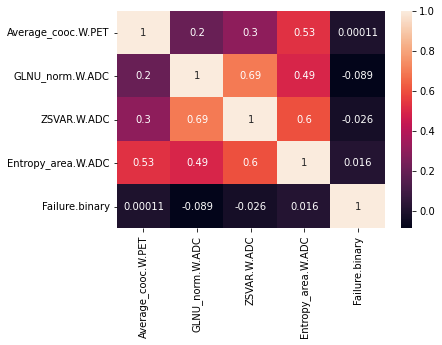

In [9]:
corr_matrix_pearson = df[["Average_cooc.W.PET","GLNU_norm.W.ADC","ZSVAR.W.ADC","Entropy_area.W.ADC","Failure.binary"]].corr(method='pearson')
sns.heatmap(corr_matrix_pearson[["Average_cooc.W.PET","GLNU_norm.W.ADC","ZSVAR.W.ADC","Entropy_area.W.ADC","Failure.binary"]], annot = True)

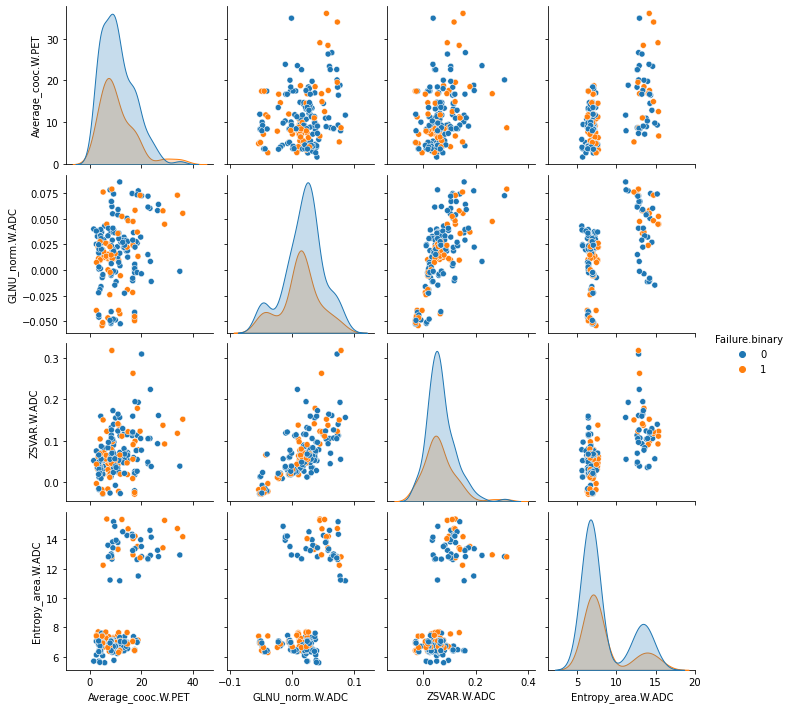

In [10]:
sns.pairplot(df,hue="Failure.binary",vars=["Average_cooc.W.PET","GLNU_norm.W.ADC","ZSVAR.W.ADC","Entropy_area.W.ADC"],diag_kind="kde")

**creation of plot_distribution function**

In [11]:
#@title

import plotly.figure_factory as ff
D = df[(df['Failure.binary'] != 0)]
H = df[(df['Failure.binary'] == 0)]

def plot_distribution(data_select, size_bin) :  
    # 2 datasets
    tmp1 = D[data_select]
    tmp2 = H[data_select]
    hist_data = [tmp1, tmp2]
    
    group_labels = ['0', '1']
    colors = ['#FFD700', '#7EC0EE']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = size_bin, curve_type='kde')
    
    fig['layout'].update(title = data_select)

    py.iplot(fig, filename = 'Density plot')

In [12]:
plot_distribution('Average_cooc.W.PET', 0)
# You can play around in this cell by checking other columns using the plot_distribution function. Just change the 'Average_cooc.W.PET' to the column that you choose

## Scaling and Applying PCA on the data

In [13]:
# splitting the target column from the features
y = pd.DataFrame(df,columns=["Failure.binary"])
x = df.drop("Failure.binary",axis=1)

# x for features and y for target variable

In [14]:
# scaling features using standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for columnName in x:
    scaler.fit(x[[columnName]])
    x[columnName] = scaler.transform(x[[columnName]])

scaled_x = x
scaled_x.head()

,Entropy_cooc.W.ADC,GLNU_align.H.PET,Min_hist.PET,Max_hist.PET,Mean_hist.PET,Variance_hist.PET,Standard_Deviation_hist.PET,Skewness_hist.PET,Kurtosis_hist.PET,Energy_hist.PET,...,LZLGE.W.ADC,LZHGE.W.ADC,GLNU_area.W.ADC,ZSNU.W.ADC,ZSP.W.ADC,GLNU_norm.W.ADC,ZSNU_norm.W.ADC,GLVAR_area.W.ADC,ZSVAR.W.ADC,Entropy_area.W.ADC
0,0.554314,-0.572091,-0.455298,-0.437242,-0.421557,-0.263268,-0.236852,-0.323760,-0.273793,0.050348,...,0.015349,-0.782226,-0.693232,-0.653038,-0.508114,0.077177,-0.490055,0.040310,-0.706429,-0.743340
1,-0.065033,-0.791047,0.501110,0.149074,0.316199,0.395979,0.297774,-0.177428,-0.267163,0.092145,...,-0.067509,0.298387,-0.611587,-0.567484,-0.562108,-0.062609,-0.545867,-0.354364,-0.427150,-0.578588
2,0.461080,-0.060396,-1.153365,-1.179881,-1.139123,-0.898079,-1.131847,-0.961141,-0.473048,0.047566,...,-0.058199,-0.730378,-0.520352,-0.457554,-0.523501,0.269302,-0.588394,1.073154,0.098793,-0.451958
3,1.146096,2.681503,-0.445752,-0.152052,-0.349518,-0.281003,-0.254055,-0.115870,0.120284,-0.012453,...,0.076795,0.421112,-0.313839,-0.121050,-0.525039,-0.187714,-0.512594,0.285470,-0.481509,-0.405647
4,0.345873,-0.067577,-0.991260,-1.108994,-1.118356,-0.935939,-1.242989,0.960448,0.909509,0.153660,...,-0.073095,-0.011148,-0.616050,-0.537972,-0.542414,0.277280,-0.534185,0.002222,-0.236449,-0.487224


In [15]:
# Applying PCA 

from sklearn.decomposition import PCA
pca = PCA(0.95)
PCA_X = pca.fit_transform(scaled_x) 


In [16]:
pca_result = pd.concat([pd. DataFrame(PCA_X), y], axis=1)
pca_result.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,Failure.binary
0,-6.954694,3.569249,-1.180620,-3.464916,1.918922,1.173752,-2.691627,-1.389934,0.920180,0.774429,-1.668298,-0.410331,-1.432907,0.068100,-1.135211,-1.247801,0
1,-7.002584,0.629255,-0.159227,-4.733125,-3.181165,3.353621,0.800055,0.763512,-1.023575,-0.329639,0.794510,-0.442753,-0.121288,-0.208686,-0.369180,-0.863738,1
2,-6.207787,6.074705,1.368186,2.562081,2.189429,-1.990482,-6.645537,-1.624850,1.271778,-1.432137,-2.361748,-3.162782,0.284434,1.633985,-0.728843,0.516482,0
3,-7.008789,-1.688429,5.509770,0.680136,1.224217,1.253358,0.916428,-2.070753,-1.449119,-0.858641,-0.972698,-1.260127,-0.060629,-0.191022,-0.554126,-0.329836,1
4,-8.235393,8.124463,2.430092,4.771094,0.051850,1.697534,1.448972,1.259667,2.470280,-0.997892,0.508307,1.317165,2.150517,1.540427,0.027521,-0.461598,0


**We only obtain 15 columns from the original 428 columns thanks to PCA**

# Splitting the data

In [17]:
# Scaling the data with 80% training data and 20% testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(PCA_X, y, test_size=0.2)

# Performing 10 fold cross validation and grid search

In [18]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

In [19]:
# Importing ML libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [20]:
# Setting up gridsearch
from sklearn.model_selection import GridSearchCV
model_params = {
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }  
    },
    'knn':{
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [5,10,15],
            'algorithm': ['auto', 'ball_tree', 'kd_tree']
        }
    },
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'xgboost':{
        'model': xgb.XGBClassifier(),
        'params': {
            'n_estimators': [500,1000]
        }
    }
}

# Comparing different machine learning models


In [21]:
# training the data from different ml models
from sklearn.model_selection import cross_val_score
scores_knn = []
scores_svm = []
scores_rf = []
scores_xgb = []

scores_lr = cross_val_score(LogisticRegression(), PCA_X, y.values.ravel(),cv=10)
scores_svm = cross_val_score(SVC(), PCA_X, y.values.ravel(),cv=10)
scores_rf = cross_val_score(RandomForestClassifier(), PCA_X, y.values.ravel(),cv=10)
scores_knn = cross_val_score(KNeighborsClassifier(), PCA_X, y.values.ravel(),cv=10)
scores_xgb = cross_val_score(xgb.XGBClassifier(), PCA_X, y.values.ravel(),cv=10)

In [22]:
#@title
# defining a function for taking an average of a list
def Average(score): 
    avg = sum(score) / len(score)  
    return avg

In [23]:
print("Average of lr is ",Average(scores_lr))
print("Average of knn is ",Average(scores_knn))
print("Average of svm is ",Average(scores_svm))
print("Average of rf is ",Average(scores_rf))
print("Average of xgb is ",Average(scores_xgb))

Average of lr is  0.7552631578947369
Average of knn is  0.7255263157894737
Average of svm is  0.7505263157894736
Average of rf is  0.746315789473684
Average of xgb is  0.7405263157894736


In [35]:
scores = []
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=10, return_train_score=False)
    clf.fit(PCA_X, y.values.ravel())
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_parameters': clf.best_params_
    })
    
model_scores = pd.DataFrame(scores,columns=['model','best_score','best_parameters'])
model_scores 

,model,best_score,best_parameters
0,logistic_regression,0.755263,{'C': 1}
1,knn,0.735526,"{'algorithm': 'auto', 'n_neighbors': 10}"
2,svm,0.776316,"{'C': 1, 'kernel': 'linear'}"
3,random_forest,0.719737,{'n_estimators': 10}
4,xgboost,0.745526,{'n_estimators': 1000}


**As we can see, Support Vector Machine with the parameters C=1 and kernel=linear performs the best among them all but since this is an imbalance dataset. We should compare this with other evaluation metrics that can be seen in the next cell**

# Evaluation Metrics

## ROC-AUC

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score

LR = LogisticRegression(C = 1).fit(x_train,y_train.values.ravel())
KNN = KNeighborsClassifier(algorithm = "auto", n_neighbors = 10).fit(x_train,y_train.values.ravel())
SVM = SVC(C=1, kernel = 'linear',probability=True).fit(x_train,y_train.values.ravel())
RF = RandomForestClassifier(n_estimators = 10).fit(x_train,y_train.values.ravel())
XGB = xgb.XGBClassifier(n_estimators = 1000).fit(x_train,y_train.values.ravel())

r_probs = [0 for _ in range(len(y_test))]
LR_predprob = LR.predict_proba(x_test)
KNN_predprob = KNN.predict_proba(x_test)
SVM_predprob = SVM.predict_proba(x_test)
RF_predprob = RF.predict_proba(x_test)
XGB_predprob = XGB.predict_proba(x_test)

In [26]:
# Calculating ROC score
LR_predprob = LR_predprob[:, 1]
KNN_predprob = KNN_predprob[:, 1]
SVM_predprob = SVM_predprob[:,1]
RF_predprob = RF_predprob[:, 1]
XGB_predprob = XGB_predprob[:, 1]

r_auc = roc_auc_score(y_test, r_probs)
LR_auc = roc_auc_score(y_test, LR_predprob)
KNN_auc = roc_auc_score(y_test, KNN_predprob)
SVM_auc = roc_auc_score(y_test, SVM_predprob)
RF_auc = roc_auc_score(y_test, RF_predprob)
XGB_auc = roc_auc_score(y_test, XGB_predprob)

In [27]:
print('Random (chance) Prediction: ROC-AUC = %.3f' % (r_auc))
print('Logistic Regression: ROC-AUC = %.3f' % (LR_auc))
print('K Nearest Neighbor: ROC-AUC = %.3f' % (KNN_auc))
print('Support Vector Machine: ROC-AUC = %.3f' % (KNN_auc))
print('Random Forest: ROC-AUC = %.3f' % (RF_auc))
print('XGBoost: ROC-AUC = %.3f' % (XGB_auc))

Random (chance) Prediction: ROC-AUC = 0.500
Logistic Regression: ROC-AUC = 0.672
K Nearest Neighbor: ROC-AUC = 0.657
Support Vector Machine: ROC-AUC = 0.657
Random Forest: ROC-AUC = 0.595
XGBoost: ROC-AUC = 0.705


## Accuracy

In [28]:
model_scores 

,model,best_score,best_params
0,logistic_regression,0.755263,{'C': 1}
1,knn,0.735526,"{'algorithm': 'auto', 'n_neighbors': 10}"
2,svm,0.776316,"{'C': 1, 'kernel': 'linear'}"
3,random_forest,0.735789,{'n_estimators': 10}
4,xgboost,0.745526,{'n_estimators': 1000}


## F1-Score

In [29]:
from sklearn.metrics import classification_report
LR_pred = LR.predict(x_test)
print("Classification report of Logistic Regression: \n " + str(classification_report(y_test,LR_pred)))

Classification report of Logistic Regression: 
               precision    recall  f1-score   support

           0       0.65      0.91      0.75        22
           1       0.78      0.39      0.52        18

    accuracy                           0.68        40
   macro avg       0.71      0.65      0.64        40
weighted avg       0.70      0.68      0.65        40



In [30]:
KNN_pred = KNN.predict(x_test)
print("Classification report of K Nearest Neighbors: \n " + str(classification_report(y_test,KNN_pred)))

Classification report of K Nearest Neighbors: 
               precision    recall  f1-score   support

           0       0.60      0.95      0.74        22
           1       0.80      0.22      0.35        18

    accuracy                           0.62        40
   macro avg       0.70      0.59      0.54        40
weighted avg       0.69      0.62      0.56        40



In [31]:
SVM_pred = SVM.predict(x_test)
print("Classification report of Support Vector Machine: \n " + str(classification_report(y_test,SVM_pred)))

Classification report of Support Vector Machine: 
               precision    recall  f1-score   support

           0       0.62      0.91      0.74        22
           1       0.75      0.33      0.46        18

    accuracy                           0.65        40
   macro avg       0.69      0.62      0.60        40
weighted avg       0.68      0.65      0.62        40



In [32]:
RF_pred = RF.predict(x_test)
print("Classification report of Random Forest: \n " + str(classification_report(y_test,RF_pred)))

Classification report of Random Forest: 
               precision    recall  f1-score   support

           0       0.56      0.86      0.68        22
           1       0.50      0.17      0.25        18

    accuracy                           0.55        40
   macro avg       0.53      0.52      0.46        40
weighted avg       0.53      0.55      0.49        40



In [33]:
XGB_pred = XGB.predict(x_test)
print("Classification report of XGBoost: \n " + str(classification_report(y_test,XGB_pred)))

Classification report of XGBoost: 
               precision    recall  f1-score   support

           0       0.67      0.73      0.70        22
           1       0.62      0.56      0.59        18

    accuracy                           0.65        40
   macro avg       0.65      0.64      0.64        40
weighted avg       0.65      0.65      0.65        40



**Conclusion: In AUC-ROC, XGBOOST got the best performance with 70% score.
In accuracy, Support Vector Machine got the best performance with 77%.
In F1-Score, Logistic Regression got the best performance with 68%**